# Progetto d'esame di Data Analysis in Experimental Physics with Machine Learning - Attempt n.2

Dataset ipotesi: https://github.com/spMohanty/PlantVillage-Dataset/tree/master

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

fatal: destination path 'PlantVillage-Dataset' already exists and is not an empty directory.


In [3]:
!dir PlantVillage-Dataset\raw\color

 Volume in drive C is OS
 Volume Serial Number is 90BA-7656

 Directory of C:\Users\Itsashashi\progetto-daml\PlantVillage-Dataset\raw\color

13/07/2025  16:35    <DIR>          .
13/07/2025  16:36    <DIR>          ..
13/07/2025  16:34    <DIR>          Apple___Apple_scab
13/07/2025  16:34    <DIR>          Apple___Black_rot
13/07/2025  16:34    <DIR>          Apple___Cedar_apple_rust
13/07/2025  16:34    <DIR>          Apple___healthy
13/07/2025  16:34    <DIR>          Blueberry___healthy
13/07/2025  16:34    <DIR>          Cherry_(including_sour)___healthy
13/07/2025  16:34    <DIR>          Cherry_(including_sour)___Powdery_mildew
13/07/2025  16:34    <DIR>          Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
13/07/2025  16:34    <DIR>          Corn_(maize)___Common_rust_
13/07/2025  16:34    <DIR>          Corn_(maize)___healthy
13/07/2025  16:34    <DIR>          Corn_(maize)___Northern_Leaf_Blight
13/07/2025  16:34    <DIR>          Grape___Black_rot
13/07/2025  16:34    

### Dataset splitting
Since the dataset employed is quite large, it was split into testing, validation and training set using the 70/15/15 ratio

In [4]:
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [5]:
import splitfolders

In [6]:
splitfolders.ratio(
    "PlantVillage-Dataset/raw/color",       # Input folder
    output= "PlantVillage-Split",        # Output folder
    seed=1337,                          # Reproducible split
    ratio=(.7, .15, .15)                  # Train, val, test
)

Copying files: 54305 files [02:21, 385.01 files/s]


In [8]:
import os
print("Current directory:", os.getcwd())
os.path.exists("PlantVillage-Split")
s_path = os.path.abspath("PlantVillage-Split")
print(s_path)
os.listdir("PlantVillage-Split")

Current directory: C:\Users\Itsashashi\progetto-daml
C:\Users\Itsashashi\progetto-daml\PlantVillage-Split


['test', 'train', 'val']

In [9]:
train_path = s_path + "/train"
val_path = s_path + "/val"
test_path = s_path + "/test"

In [10]:
import glob

train_imgs = glob.glob("PlantVillage-Split/train/**/*.jpg", recursive=True)
val_imgs = glob.glob("PlantVillage-Split/val/**/*.jpg", recursive=True)
test_imgs = glob.glob("PlantVillage-Split/test/**/*.jpg", recursive=True)

print("Train:", len(train_imgs))
print("Validation:", len(val_imgs))
print("Test:", len(test_imgs))

Train: 37995
Validation: 8129
Test: 8179


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models

In [12]:
img_size = (256, 256)
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    color_mode= "rgb"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    color_mode= "rgb"

)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    color_mode= "rgb"

)

test_ds

Found 37997 files belonging to 38 classes.
Found 8129 files belonging to 38 classes.
Found 8179 files belonging to 38 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

### MODEL #1

In [14]:
# Get number of classes from dataset
num_classes = len(train_ds.class_names)
print(num_classes)

38


In [17]:
# Define the model
model = models.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Rescaling(1./255),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # helps prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

In [18]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [19]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=4,
    callbacks=[early_stop]
)

Epoch 1/4
594/594 ━━━━━━━━━━━━━━━━━━━━ 1765s 3s/step - accuracy: 0.2324 - loss: 3.0008 - val_accuracy: 0.6306 - val_loss: 1.3547
Epoch 2/4
594/594 ━━━━━━━━━━━━━━━━━━━━ 1892s 3s/step - accuracy: 0.5033 - loss: 1.7004 - val_accuracy: 0.7641 - val_loss: 0.7996
Epoch 3/4
594/594 ━━━━━━━━━━━━━━━━━━━━ 2001s 3s/step - accuracy: 0.5949 - loss: 1.3261 - val_accuracy: 0.7927 - val_loss: 0.7143
Epoch 4/4
594/594 ━━━━━━━━━━━━━━━━━━━━ 1887s 3s/step - accuracy: 0.6348 - loss: 1.1532 - val_accuracy: 0.8142 - val_loss: 0.6020


In [22]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

128/128 ━━━━━━━━━━━━━━━━━━━━ 90s 697ms/step - accuracy: 0.8184 - loss: 0.6165

✅ Test Accuracy: 0.8168


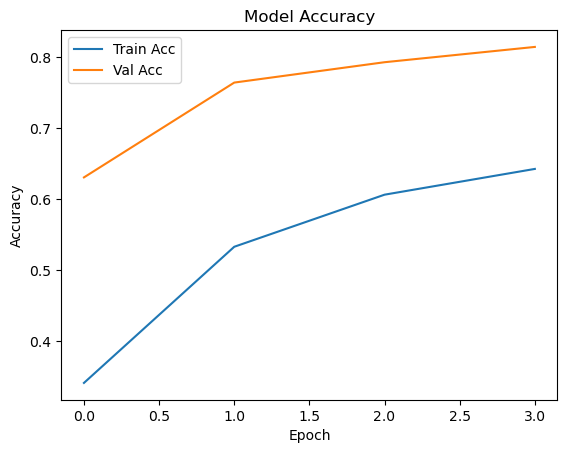

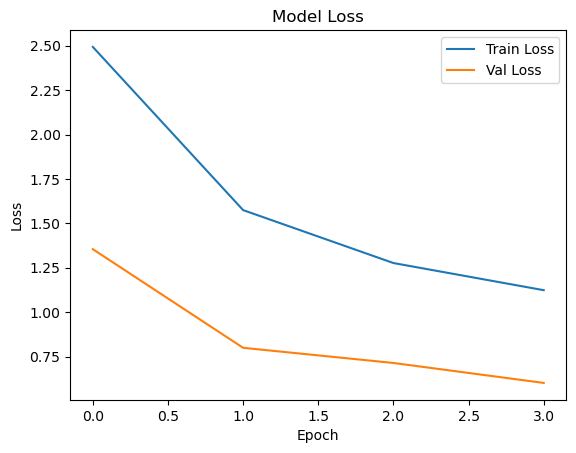

In [23]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()